In [ ]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as pp
import glob
from sklearn.metrics import accuracy_score, confusion_matrix
import cv2

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive/", force_remount=True)


In [ ]:
# On récupère la data depuis un zip que l'on a déposé à la racine de notre drive
zip_path = "/content/gdrive/My Drive/data.zip"

!cp "{zip_path}" .

!unzip -q data.zip

### Import en greyscale et batch-resize simultanés des images :

In [ ]:
train_angry = [cv2.imread(file, 0) for file in glob.glob("./data/train/angry/*.jpg")]
train_disgust = [cv2.imread(file, 0) for file in glob.glob("./data/train/disgust/*.jpg")]
train_fear = [cv2.imread(file, 0) for file in glob.glob("./data/train/fear/*.jpg")]
train_happy = [cv2.imread(file, 0) for file in glob.glob("./data/train/happy/*.jpg")]
train_neutral = [cv2.imread(file, 0) for file in glob.glob("./data//train/neutral/*.jpg")]
train_sad = [cv2.imread(file, 0) for file in glob.glob("./data/train/sad/*.jpg")]
train_surprise = [cv2.imread(file, 0) for file in glob.glob("./data/train/surprise/*.jpg")]

test_angry = [cv2.imread(file, 0) for file in glob.glob("./data/test/angry/*.jpg")]
test_disgust = [cv2.imread(file, 0) for file in glob.glob("./data/test/disgust/*.jpg")]
test_fear = [cv2.imread(file, 0) for file in glob.glob("./data/test/fear/*.jpg")]
test_happy = [cv2.imread(file, 0) for file in glob.glob("./data/test/happy/*.jpg")]
test_neutral = [cv2.imread(file, 0) for file in glob.glob("./data/test/neutral/*.jpg")]
test_sad = [cv2.imread(file, 0) for file in glob.glob("./data/test/sad/*.jpg")]
test_surprise = [cv2.imread(file, 0) for file in glob.glob("./data/test/surprise/*.jpg")]

Batch-resizing :

In [ ]:
train_angry = [cv2.resize(file, (48, 48)) for file in train_angry]
train_disgust = [cv2.resize(file, (48, 48)) for file in train_disgust]
train_fear = [cv2.resize(file, (48, 48)) for file in train_fear]
train_happy = [cv2.resize(file, (48, 48)) for file in train_happy]
train_neutral = [cv2.resize(file, (48, 48)) for file in train_neutral]
train_sad = [cv2.resize(file, (48, 48)) for file in train_sad]
train_surprise = [cv2.resize(file, (48, 48)) for file in train_surprise]

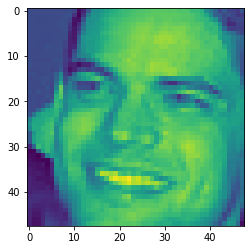

In [ ]:
pp.imshow(train_happy[10])

In [ ]:
print("longueur train_angry :", len(train_angry))
print("longueur train_disgust :", len(train_disgust))
print("longueur train_fear :", len(train_fear))
print("longueur train_happy :", len(train_happy))
print("longueur train_neutral :", len(train_neutral))
print("longueur train_sad :", len(train_sad))
print("longueur train_surprise :", len(train_surprise))

longueur train_angry : 3980
longueur train_disgust : 435
longueur train_fear : 4097
longueur train_happy : 7212
longueur train_neutral : 4965
longueur train_sad : 4830
longueur train_surprise : 3171


Concaténons nos morceaux de x_train en un x_train unique :

In [ ]:
x_train = np.concatenate((np.asarray(train_angry, dtype=list),
                          np.asarray(train_disgust, dtype=list),
                          np.asarray(train_fear, dtype=list), 
                          np.asarray(train_happy, dtype=list),
                          np.asarray(train_neutral, dtype=list),
                          np.asarray(train_sad, dtype=list), 
                          np.asarray(train_surprise, dtype=list)), axis=0)
x_train.shape

(28690, 48, 48)

Concaténons nos morceaux de x_test en un x_test unique :

In [ ]:
x_test = np.concatenate((np.asarray(test_angry, dtype=list),
                          np.asarray(test_disgust, dtype=list),
                          np.asarray(test_fear, dtype=list), 
                          np.asarray(test_happy, dtype=list),
                          np.asarray(test_neutral, dtype=list),
                          np.asarray(test_sad, dtype=list), 
                          np.asarray(test_surprise, dtype=list)), axis=0)
x_test.shape

(7178, 48, 48)

Création des labels, les labels pour les émotions vont de 0 à 6 et sont mappés ainsi :

0 - angry

1 - disgust

2 - fear

3 - happy

4 - neutral

5 - sad

6 - surprise

In [ ]:
y_train_0 = np.zeros((len(train_angry)))
y_train_1 = np.ones((len(train_disgust)))
y_train_2 = np.ones((len(train_fear)))*2
y_train_3 = np.ones((len(train_happy)))*3
y_train_4 = np.ones((len(train_neutral)))*4
y_train_5 = np.ones((len(train_sad)))*5
y_train_6 = np.ones((len(train_surprise)))*6

In [ ]:
y_test_0 = np.zeros((len(test_angry)))
y_test_1 = np.ones((len(test_disgust)))
y_test_2 = np.ones((len(test_fear)))*2
y_test_3 = np.ones((len(test_happy)))*3
y_test_4 = np.ones((len(test_neutral)))*4
y_test_5 = np.ones((len(test_sad)))*5
y_test_6 = np.ones((len(test_surprise)))*6

On concatène nos vecteurs colones de labels :

In [ ]:
y_train = np.concatenate((np.asarray(y_train_0),
                          np.asarray(y_train_1), 
                          np.asarray(y_train_2), 
                          np.asarray(y_train_3), 
                          np.asarray(y_train_4), 
                          np.asarray(y_train_5),
                          np.asarray(y_train_6)), axis=0)

In [ ]:
y_test = np.concatenate((np.asarray(y_test_0),
                          np.asarray(y_test_1), 
                          np.asarray(y_test_2), 
                          np.asarray(y_test_3), 
                          np.asarray(y_test_4), 
                          np.asarray(y_test_5),
                          np.asarray(y_test_6)), axis=0)

In [ ]:
len(y_train)

28690

In [ ]:
len(y_test)

7178

Shuffle des données

In [ ]:
range_aleatoire = np.random.permutation(28690)
x_train = x_train[range_aleatoire]
y_train = y_train[range_aleatoire]

range_aleatoire = np.random.permutation(7178)
x_test = x_test[range_aleatoire]
y_test = y_test[range_aleatoire]

Standardisation

In [ ]:
x_train = x_train.astype('float')/255
x_test = x_test.astype('float')/255

In [ ]:
x_train.shape

(28690, 48, 48)

In [ ]:
x_train.shape

(28690, 48, 48)

In [ ]:
y_train.shape

(28690,)

In [ ]:
x_train = x_train.reshape(-1, 48, 48, 1)

In [ ]:
x_test = x_test.reshape(-1, 48, 48, 1)

In [ ]:
x_train.shape

(28690, 48, 48, 1)

In [ ]:
y_train.shape

(28690,)

One-hot encoding du y_train :

In [ ]:
# Cette méthode va convertir notre vecteur de integers allant de 0 à 6 (nos 7 classes)
# vers une matrice de classes binaire qui sera compatible avec model.fit():
from tensorflow.keras.utils import to_categorical
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

In [ ]:
from tensorflow.keras.models import load_model

Création du modèle

In [ ]:
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau

Utilisation de callbacks de la bibliothèque Keras pour affiner notre modèle.

In [ ]:
# Le Early Stopping est un callback qui va arrêter l'apprentissage afin d'éviter le suraprentissage.
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    min_delta=0.00005,
    patience=11,
    verbose=1,
    restore_best_weights=True,
)

# Le Reduce LR on Plateau va réduire le learning rate lorsque la val_accuracy atteint un plateau afin
# que le modèle continue à apprendre des features interessantes :
ReduceLROnPlateau = ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.5,
    patience=7,
    min_lr=1e-7,
    verbose=1,
)

# On charge nos callbacks dans une liste :
callbacks = [early_stopping, ReduceLROnPlateau]

In [ ]:
"""
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.15,
    height_shift_range=0.15,
    shear_range=0.15,
    zoom_range=0.15,
    horizontal_flip=True,
)

train_datagen.fit(x_train)
"""

In [ ]:
model = tf.keras.Sequential()

# Conv2D avec elu en activation.
# ELU (Exponential Linear Unit) approche les valeurs moyennes proches
# de zéro et améliore les performances d'entraînement. 
model.add(tf.keras.layers.Conv2D(32,7,
                                padding="same",
                                activation="elu",
                                input_shape=(48,48,1),
                                kernel_initializer='he_normal',))

model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.BatchNormalization())

# Drop-out et bruit pour éviter le surapprentissage :
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.GaussianNoise(0.5))

model.add(tf.keras.layers.Conv2D(128, 5,
                                padding="same",
                                activation="elu",
                                kernel_initializer='he_normal',))

model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.BatchNormalization())

# Le modèle marche certes mieux avec des activations "elu"
# en général mais en gardant une "relu" ici il donne un meilleur résultat. 
model.add(tf.keras.layers.Conv2D(128, 3,
                                padding="same",
                                activation="relu"))

model.add(tf.keras.layers.MaxPooling2D(2))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.GaussianNoise(0.5))
#
model.add(tf.keras.layers.Conv2D(128, 7,
                                padding="same",
                                activation="relu",
                                #activation="elu",
                                #kernel_initializer='he_normal'
                                ))

model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.BatchNormalization())


model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.GaussianNoise(0.5))


model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense((128), activation="elu", kernel_initializer="he_normal"))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.GaussianNoise(0.5))

# Dense de sortie avec 7 unités pour les sept classes d'émotion.
model.add(tf.keras.layers.Dense(7, activation='softmax'))

# Pour l'optimiseur, Nadam est une version modifiée de Adam qui intègre le Nesterov
# Accelerated Gradient (NAG) pour le momentum.
#(momentum = aggrégat de gradients qui remplace le stochastic gradient descent)
opti = tf.keras.optimizers.Nadam(learning_rate=0.001)

model.compile(loss="categorical_crossentropy",
             optimizer=opti,
             metrics=["accuracy"]
             )

# On intègre les callbacks créés plus haut à notre fit.
history = model.fit(x_train,
                    y_train_encoded,
                    epochs=200,
                    validation_split=0.2,
                    batch_size=32,
                    shuffle=True,
                    callbacks=callbacks,
                    use_multiprocessing=True
                    )

# Sauvegarde du modèle qui a été faite sur drive.
#model.save("/content/gdrive/My Drive/modele_emotions")

# On prédit sur test pour avoir l'accuracy réelle.
y_pred = model.predict(x_test)

y_pred = [e.argmax() for e in y_pred]

print("accuracy_score :", accuracy_score(y_test, y_pred).round(4))

Epoch 1/200
718/718 [==============================] - 10s 11ms/step - loss: 2.6490 - accuracy: 0.2097 - val_loss: 1.8136 - val_accuracy: 0.3048
Epoch 2/200
718/718 [==============================] - 8s 11ms/step - loss: 1.6924 - accuracy: 0.3388 - val_loss: 1.6351 - val_accuracy: 0.3803
Epoch 3/200
718/718 [==============================] - 8s 11ms/step - loss: 1.5519 - accuracy: 0.3977 - val_loss: 1.4579 - val_accuracy: 0.4195
Epoch 4/200
718/718 [==============================] - 8s 11ms/step - loss: 1.4835 - accuracy: 0.4327 - val_loss: 1.5643 - val_accuracy: 0.4068
Epoch 5/200
718/718 [==============================] - 8s 11ms/step - loss: 1.4129 - accuracy: 0.4557 - val_loss: 1.5169 - val_accuracy: 0.4223
Epoch 6/200
718/718 [==============================] - 8s 11ms/step - loss: 1.3831 - accuracy: 0.4733 - val_loss: 1.3837 - val_accuracy: 0.4578
Epoch 7/200
718/718 [==============================] - 8s 11ms/step - loss: 1.3508 - accuracy: 0.4822 - val_loss: 1.2723 - val_accuracy